# PANDAS BASE I: INDEXACIÓN

Dominar la indexación es absolutamente clave.

Lo estaremos usando constantemente, tanto para preparar el dataset como para hacer consultas de Business Analytics como para hacer Machine Learning.

Pero es uno de los puntos más confusos cuando se aprende Pandas.

Así que he realizado un gran esfuerzo para masticar todo lo que debes conocer y condensarlo al máximo posible en este módulo.

Por tanto, aunque parezca un módulo corto, te aviso de que será muy intenso.

Te recomiendo realizarlo varias veces y hacer muchos ejercicios para consolidar las técnicas que aprendarás aquí, porque como te decía son prácticamente la base para todo lo que hagamos de Data Science con Python.

In [1]:
datos = '../../00_Datasets//DataSetKivaCreditScoring.csv'

Carga de paquetes y datos:

In [2]:
import pandas as pd
pd.options.display.min_rows = 6

In [3]:
df = pd.read_csv(datos, sep = ';')
df

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,5257,2007-06-02T03:57:56Z,1000,Ghana,GH,1000,2008-03-13T10:01:32Z,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid
5145,5259,2007-06-05T04:56:45Z,800,Ghana,GH,800,2008-03-13T10:01:33Z,800.0,Food Market,Food,False,Beauty,Working capital,paid


## INDEXAR UN DATAFRAME

Este es uno de los puntos más complejos debido a la gran cantidad de formas de hacer lo mismo.

Te las voy a enseñar todas, pero no hace falta que las memorices todas, simplemente entiéndelas y que te suenen. 

Afortunadamente he creado una Cheatsheet a la que podrás acudir cuando necesites indexar, que va a ser muy útil tanto para ver la "foto global" como para tener a mano y consultarla rápidamente.

Luego lo que pasará con la práctica es que tendrás tus preferidas que serás las que usarás habitualmente.

Vamos a diferenciar entre:

* Cómo indexar **columnas**
* Cómo indexar **filas**
* Cómo indexar **ambas**

Además dentro de cada una de ellas tenemos 3 formas de indexar:

* Por **nombre**
* Por **posición**
* Por **criterio**: es decir, que cumplan unas condiciones

Pero además tenemos 3 modalidades:

* Indexación **simple**: un sólo elemento
* Indexación **múltiple**: varios elementos a la vez especificados de forma explícita
* Indexación **por rango**: varios elementos a la vez especificados mediante un rango

### Trabajar sobre el índice

Antes de aprender a indexar vamos a saber más sobre el index, que es un tema clave en Pandas.

Como habíamos visto al crear o importar un Series o un Dataframe crea el índice automáticamente.

In [4]:
df.head(3)

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


Si los datos ya trajeran un índice válido, como es el caso de nuestro dataset, se lo podemos decir en la importación para que lo use en lugar de crear el índice automático.

In [5]:
df = pd.read_csv(datos, sep = ';',index_col='id')
df.head(3)

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


Para resetear la variable asignada al índice y que vuelva a poner uno automático usamos **reset_index()**

In [6]:
df.reset_index(inplace=True)
df.head(3)

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


Si quisiéramos poner un índice después de haber hecho la importación usaríamos **set_index()**

In [7]:
df.set_index('id', inplace=True)
df.head(3)

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


Obtener la posición de un elemento determinado del índice: **index.get_loc('elemento')**

In [8]:
#Por posición
df.index.get_loc(85)

1

Cambiar un elemento del índice:

Si queremos cambiar un elemento del índice tenemos que usar el método rename con un diccionario con el formato valor_viejo:valor_nuevo

**df.rename(index = {'valor_viejo':'valor_nuevo'},inplace = True)**

Nota: se podrían hacer varios cambios al a vez, simplemente sería incluirle más elementos al diccionario.

In [9]:
df.rename(index = {85:185},inplace = True)
df.head(3)

,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
185,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


Cambiar nombres de las columnas:

Mismo proceso que con el índice:

**df.rename(columns = {'valor_viejo':'valor_nuevo'},inplace = True)**

Nota: se podrían hacer varios cambios al a vez, simplemente sería incluirle más elementos al diccionario.

In [10]:
df.rename(columns = {'Country':'Pais'},inplace = True)
df.head(3)

,Funded Date,Funded Amount,Pais,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
id,,,,,,,,,,,,,
84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
185,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


Vamos a resetearlo de nuevo porque en adelante usaremos el índice automático.

In [11]:
df.reset_index(inplace=True)
df.head(3)

,id,Funded Date,Funded Amount,Pais,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,185,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid


#### Multiíndices (técnica PRO)

Este es un tema más avanzado pero que usaremos más adelante cuando empecemos a hacer consultas avanzadas sobre los datos.

Un DataFrame puede tener más de un índice, es lo que se llama MultiIndex.

En algunos casos usar este formato puede darnos bastante flexibilidad, especialmente para tareas de hacer queries.

Un uso típico es una tabla donde el multiíndice sea Cliente-Producto.

In [12]:
#Creamos unos datos de ejemplo
dict = {'cliente': ['A','A','B','B','B','C','C'],
        'producto': ['1','2','1','2','3','2','3'],
        'importe': ['100','200','100','200','300','200','300']}
tabla_mi = pd.DataFrame(dict)
tabla_mi

,cliente,producto,importe
0,A,1,100
1,A,2,200
2,B,1,100
3,B,2,200
4,B,3,300
5,C,2,200
6,C,3,300


In [13]:
#Establecemos un multiindice
tabla_mi.set_index(['cliente','producto'],inplace=True)
tabla_mi

importe
cliente producto        
A       1            100
        2            200
B       1            100
        2            200
        3            300
C       2            200
        3            300

Ya notamos que la propia visualización nos ayuda a interpretar los datos.

Ahora ya podemos seleccionar fácilmente usando los índices.

Por ejemplo vamos a seleccionar las compras del cliente B. Más abajo aprenderemos qué es esto de loc.

In [14]:
tabla_mi.loc['B']

,importe
producto,
1,100
2,200
3,300


O del cliente B producto 2. Notar que los valores del multiíndice se los pasamos como una tupla.

In [15]:
tabla_mi.loc[('B','2')]

importe    200
Name: (B, 2), dtype: object

Pero seleccionar elementos de la segunda jerarquía del índice (por ej todas las compras del producto 3) se hace muy complicado con la notación anterior. Por eso tenemos el método xs (que viene de cross-section) que nos ayuda a hacer estás "queries" más fácilmente.

In [16]:
#Compras sólo del cliente B
tabla_mi.xs('B')

,importe
producto,
1,100
2,200
3,300


In [17]:
#Compras sólo del producto 3 independientemente de qué cliente
tabla_mi.xs('3', level = 'producto')

,importe
cliente,
B,300
C,300


In [18]:
#Compra del cliente B y el producto 2
tabla_mi.xs(('B','2'))

importe    200
Name: (B, 2), dtype: object

Podemos deshacer el multiíndice pasándo el índice secundario a columnas.

Se hace con .unstack()

De tal forma que nos queda un dataframe al estilo de tabla cruzada con el índice principal y el secundario en columnas.

Y pondrá nulos en los cruces que no existan. Pero podemos rellenarlos con otro valor con fill_value

In [19]:
#Partimos de este df con multiindice
tabla_mi

importe
cliente producto        
A       1            100
        2            200
B       1            100
        2            200
        3            300
C       2            200
        3            300

In [20]:
#creamos el cruzado
tabla_mi_cruzada = tabla_mi.unstack()
tabla_mi_cruzada

importe          
producto       1    2    3
cliente                   
A            100  200  NaN
B            100  200  300
C            NaN  200  300

Vamos a verlo esquemáticamente:

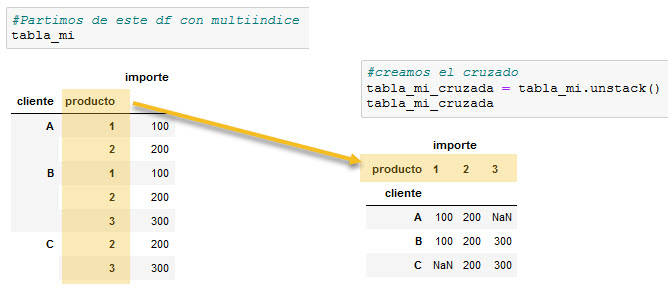

In [21]:
#Comprobamos el tipo y el índice
print(type(tabla_mi_cruzada))
tabla_mi_cruzada.index

<class 'pandas.core.frame.DataFrame'>


Index(['A', 'B', 'C'], dtype='object', name='cliente')

In [22]:
#Ej de rellenar los nulos con cero
tabla_mi.unstack(fill_value=0)

importe          
producto       1    2    3
cliente                   
A            100  200    0
B            100  200  300
C              0  200  300

In [23]:
tabla_mi

importe
cliente producto        
A       1            100
        2            200
B       1            100
        2            200
        3            300
C       2            200
        3            300

Pero también podemos pasar el principal a columnas, se hace con el parámetro level, teniendo en cuenta que va indexando en negativo de derecha a izquierda del multiíndice.

Es decir en nuestro ejemplo producto sería -1, cliente sería -2 y así

In [24]:
#Partimos de este df con multiindice
tabla_mi.unstack(level=-2)

importe          
cliente        A    B    C
producto                  
1            100  100  NaN
2            200  200  200
3            NaN  300  300

Es decir, ahora lo que hemos hecho es esto:

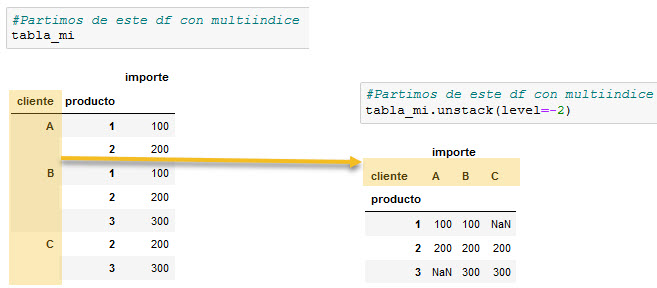

Y por supuesto también podemos hacer lo contrario: pasar una tabla cruzada a un formato multiíndice.

Se hace con .stack()

- Le incluimos el parámetro future_stack =True que maneja de forma eficiente si existen índices duplicados o si hay niveles de indice sin nombres

In [25]:
#Partimos de esta tabla cruzada
tabla_mi_cruzada

importe          
producto       1    2    3
cliente                   
A            100  200  NaN
B            100  200  300
C            NaN  200  300

In [26]:
#La pasamos a multiíndice
tabla_mi_cruzada.stack(future_stack=True)

importe
cliente producto        
A       1            100
        2            200
        3            NaN
B       1            100
        2            200
        3            300
C       1            NaN
        2            200
        3            300

Es decir:

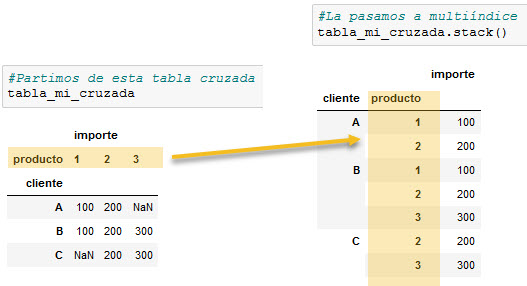

Hay veces que un nivel del índice nos molestará. Podedemos eliminarlo con droplevel, que también va hacia atrás.

In [27]:
#Ejemplo de eliminar el nivel de cliente
tabla_mi_cruzada.stack(future_stack=True).droplevel(-2)

,importe
producto,
1,100
2,200
3,NaN
1,100
2,200
3,300
1,NaN
2,200
3,300


Es decir:

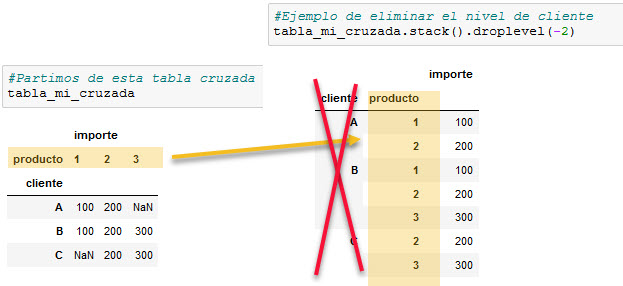

O podemos querer pasar todas las variables del índice a columnas y trabajarlo como uno normal.

Simplemente usando reset_index() se elimina el multiíndice y sus variables pasan a ser variables normales

In [28]:
tabla_mi

importe
cliente producto        
A       1            100
        2            200
B       1            100
        2            200
        3            300
C       2            200
        3            300

In [29]:
tabla_mi.reset_index(inplace=True)
tabla_mi

,cliente,producto,importe
0,A,1,100
1,A,2,200
2,B,1,100
3,B,2,200
4,B,3,300
5,C,2,200
6,C,3,300


Es decir:

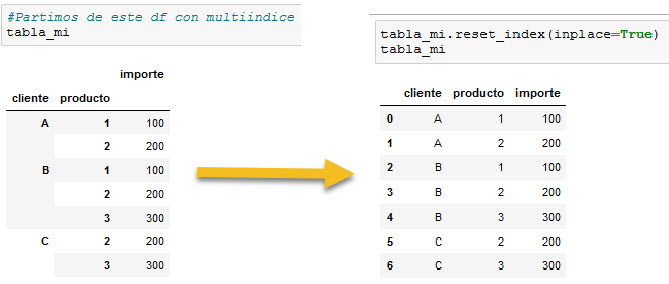

Repaso de lo aprendido:

- Podemos incorporar el índice propio de nuestros datos en el momento de la importación del df en lugar del que pone por defecto Pandas
- Podemos asignar un nuevo índice con set_index() o resetearlo para volver al estado original con reset_index()
- Accedemos a la posición de un elemento determinado del índice con index.get_loc()
- Si queremos cambiar un elemento del índice tenemos que usar el método rename con un diccionario con el formato valor_viejo:valor_nuevo
- Un DataFrame puede tener más de un índice, es lo que se llama MultiIndex
- Podemos trabajar con estos MultiIndex mediante stack() y unstack()

### Indexar Columnas

In [30]:
#Volvemos a cargar el dataset original
df = pd.read_csv('../../00_Datasets/DataSetKivaCreditScoring.csv', sep = ';')
df.head(2)

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid


Retomamos la cheatsheet como referencia:

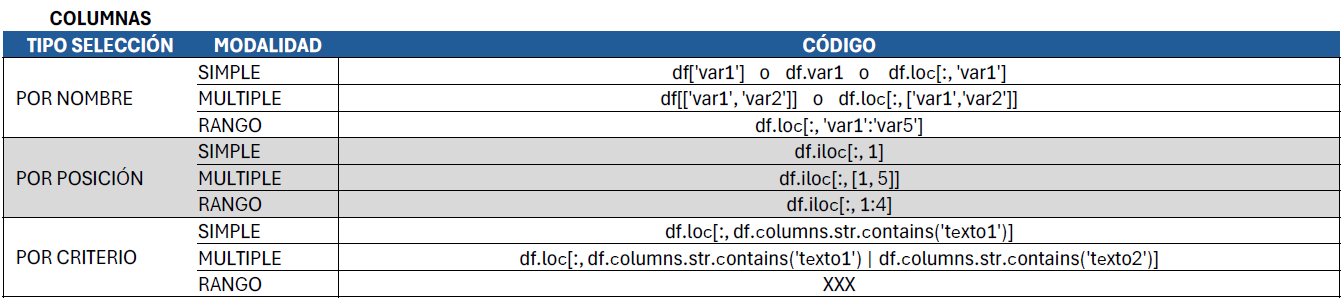

#### Por nombre

A su vez puede ser con puntos, con corchetes o con loc.

**Mediante punto**

Es la más eficiente para escribir, pero no funcionará cuando haya espacios u otros inconvenientes en el nombre de la variable. 

Ni para indexar varias variables a la vez.

Ni tampoco sirve esta notación para crear variables nuevas, que se hace con la de corchetes.

In [31]:
df.Country

0       Uganda
1       Uganda
2       Uganda
         ...  
5143     Ghana
5144     Ghana
5145     Ghana
Name: Country, Length: 5146, dtype: object

**Mediante corchetes**

Es la opción más purista. 

Funcionará cuando haya espacios u otros inconvenientes en el nombre de la variable. 

Y también para indexar varias variables a la vez (hay que pasárselas como una lista).

También es la que se usa para crear nuevas variables.

Recordar cuando extraemos una sola variable si usamos dos corchetes devolverá un dataframe en lugar de una serie.

In [32]:
df['Country']

0       Uganda
1       Uganda
2       Uganda
         ...  
5143     Ghana
5144     Ghana
5145     Ghana
Name: Country, Length: 5146, dtype: object

In [33]:
df[['Country']]

,Country
0,Uganda
1,Uganda
2,Uganda
...,...
5143,Ghana
5144,Ghana
5145,Ghana


In [34]:
df[['Country','Sector']]

,Country,Sector
0,Uganda,Food
1,Uganda,Food
2,Uganda,Agriculture
...,...,...
5143,Ghana,Construction
5144,Ghana,Construction
5145,Ghana,Food


**Mediante loc**

Es una sintaxis estandar para indexar por nombre tanto filas como columnas o ambas.

Si sólo le pasamos un parámetro indexará las filas, así que si queremos indexar columnas debemos pasarle los dos aunque al primero (el que corresponde a las filas) le pongamos : para denotar que las queremos todas.

Para varias columnas de nuevo simplemente se las pasamos como una lista.

Por último también le podemos pasar un rango de columnas.

In [35]:
#Una columna
df.loc[:,'Country']

0       Uganda
1       Uganda
2       Uganda
         ...  
5143     Ghana
5144     Ghana
5145     Ghana
Name: Country, Length: 5146, dtype: object

In [36]:
#Varias columnas explícitas
df.loc[:,['Country','Sector']]

,Country,Sector
0,Uganda,Food
1,Uganda,Food
2,Uganda,Agriculture
...,...,...
5143,Ghana,Construction
5144,Ghana,Construction
5145,Ghana,Food


In [37]:
#Rango de columnas
df.loc[:,'Country':'Sector']

,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector
0,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food
1,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food
2,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture
...,...,...,...,...,...,...,...
5143,Ghana,GH,1000,2008-03-13T10:01:32Z,1000.0,Construction,Construction
5144,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction
5145,Ghana,GH,800,2008-03-13T10:01:33Z,800.0,Food Market,Food


#### Por posición

Aquí se usa iloc, que es el equivalente de loc para cuando indexamos por posición.

Hay que recordar que en Python la indexación empieza en cero.

In [38]:
df

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,5257,2007-06-02T03:57:56Z,1000,Ghana,GH,1000,2008-03-13T10:01:32Z,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid
5145,5259,2007-06-05T04:56:45Z,800,Ghana,GH,800,2008-03-13T10:01:33Z,800.0,Food Market,Food,False,Beauty,Working capital,paid


In [39]:
#Una columna
df.iloc[:,0]

0         84
1         85
2         86
        ... 
5143    5257
5144    5258
5145    5259
Name: id, Length: 5146, dtype: int64

In [40]:
#Varias columnas explícitas
df.iloc[:,[2,5]]

,Funded Amount,Loan Amount
0,500,500
1,500,500
2,500,500
...,...,...
5143,1000,1000
5144,1100,1100
5145,800,800


In [41]:
df.iloc[:,2:5]

,Funded Amount,Country,Country Code
0,500,Uganda,UG
1,500,Uganda,UG
2,500,Uganda,UG
...,...,...,...
5143,1000,Ghana,GH
5144,1100,Ghana,GH
5145,800,Ghana,GH


#### Por criterio

Es una forma avanzada para seleccionar columnas que cumplan un criterio concreto.

Se hace con loc ya que será un criterio basado en su nombre.

Se suelen incorporar métodos de cadenas como: startswith, contains, endswith, ...

In [42]:
df

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,5257,2007-06-02T03:57:56Z,1000,Ghana,GH,1000,2008-03-13T10:01:32Z,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid
5145,5259,2007-06-05T04:56:45Z,800,Ghana,GH,800,2008-03-13T10:01:33Z,800.0,Food Market,Food,False,Beauty,Working capital,paid


In [43]:
df.loc[:,df.columns.str.contains('Amount')]

,Funded Amount,Loan Amount,Paid Amount
0,500,500,500.0
1,500,500,500.0
2,500,500,500.0
...,...,...,...
5143,1000,1000,1000.0
5144,1100,1100,1100.0
5145,800,800,800.0


In [44]:
#Una columna
df.loc[:,df.columns.str.contains('Amount')]

,Funded Amount,Loan Amount,Paid Amount
0,500,500,500.0
1,500,500,500.0
2,500,500,500.0
...,...,...,...
5143,1000,1000,1000.0
5144,1100,1100,1100.0
5145,800,800,800.0


In [45]:
criterio = df.columns.str.contains('Amount') | df.columns.str.startswith('Paid')
df.loc[:,criterio]

,Funded Amount,Loan Amount,Paid Date,Paid Amount
0,500,500,2005-12-13T12:00:40Z,500.0
1,500,500,2005-12-13T12:04:33Z,500.0
2,500,500,2005-12-13T12:06:56Z,500.0
...,...,...,...,...
5143,1000,1000,2008-03-13T10:01:32Z,1000.0
5144,1100,1100,2007-12-26T10:15:55Z,1100.0
5145,800,800,2008-03-13T10:01:33Z,800.0


In [46]:
#Varios criterios explícitos
df.loc[:,df.columns.str.contains('Amount') | df.columns.str.startswith('Paid')]

,Funded Amount,Loan Amount,Paid Date,Paid Amount
0,500,500,2005-12-13T12:00:40Z,500.0
1,500,500,2005-12-13T12:04:33Z,500.0
2,500,500,2005-12-13T12:06:56Z,500.0
...,...,...,...,...
5143,1000,1000,2008-03-13T10:01:32Z,1000.0
5144,1100,1100,2007-12-26T10:15:55Z,1100.0
5145,800,800,2008-03-13T10:01:33Z,800.0


### Indexar Filas

Retomamos la cheatsheet como referencia:

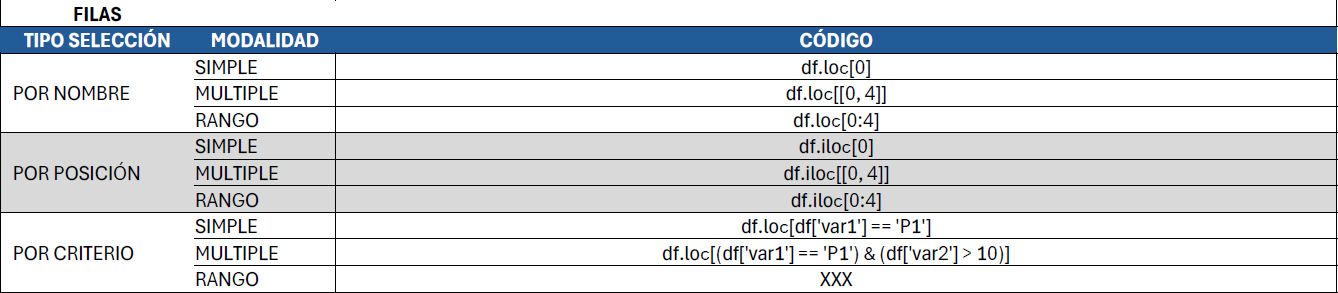

#### Por nombre

Con loc, usando un sólo parámetro.

NOTA: esta indexación usa el index, así que podrías ser posible que hubiera que cambiarlo o adaptarlo a lo que se quiera hacer antes de usarlo. Y quizá usar comillas.

In [47]:
df

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,5257,2007-06-02T03:57:56Z,1000,Ghana,GH,1000,2008-03-13T10:01:32Z,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid
5145,5259,2007-06-05T04:56:45Z,800,Ghana,GH,800,2008-03-13T10:01:33Z,800.0,Food Market,Food,False,Beauty,Working capital,paid


In [48]:
#Una fila
df.loc[0]

id                                           84
Funded Date                2005-03-31T06:27:55Z
Funded Amount                               500
Country                                  Uganda
Country Code                                 UG
Loan Amount                                 500
Paid Date                  2005-12-13T12:00:40Z
Paid Amount                               500.0
Activity                           Butcher Shop
Sector                                     Food
Delinquent                                False
Name                                    Justine
Use              Buy bulls, open a butcher shop
Status                                     paid
Name: 0, dtype: object

In [49]:
#Varias filas explícitas
df.loc[[0,5]]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
5,90,2005-03-31T06:27:55Z,300,Uganda,UG,300,2005-08-27T07:38:20Z,300.0,Restaurant,Food,False,Christine,"Buy better utensils, plates, and cutleries, an...",paid


In [50]:
#Varias filas por rango
df.loc[0:5]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
3,88,2005-03-31T06:27:55Z,300,Uganda,UG,300,2005-08-27T07:33:49Z,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
4,89,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:09:18Z,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid
5,90,2005-03-31T06:27:55Z,300,Uganda,UG,300,2005-08-27T07:38:20Z,300.0,Restaurant,Food,False,Christine,"Buy better utensils, plates, and cutleries, an...",paid


#### Por posición

Aquí se usa iloc, que es el equivalente de loc para cuando indexamos por posición.

Hay que recordar que en Python la indexación empieza en cero.

In [51]:
#Una fila
df.iloc[0]

id                                           84
Funded Date                2005-03-31T06:27:55Z
Funded Amount                               500
Country                                  Uganda
Country Code                                 UG
Loan Amount                                 500
Paid Date                  2005-12-13T12:00:40Z
Paid Amount                               500.0
Activity                           Butcher Shop
Sector                                     Food
Delinquent                                False
Name                                    Justine
Use              Buy bulls, open a butcher shop
Status                                     paid
Name: 0, dtype: object

In [52]:
#Varias filas explícitas
df.iloc[[0,5]]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
5,90,2005-03-31T06:27:55Z,300,Uganda,UG,300,2005-08-27T07:38:20Z,300.0,Restaurant,Food,False,Christine,"Buy better utensils, plates, and cutleries, an...",paid


In [53]:
#varias filas por rango
df.iloc[0:5]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
3,88,2005-03-31T06:27:55Z,300,Uganda,UG,300,2005-08-27T07:33:49Z,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
4,89,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:09:18Z,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid


#### Por criterio

En este caso la selección no es tanto sobre el índice si no sobre que las filas cumplan una serie de criterios de las columnas.

Por tanto se puede hacer con loc o simplemente con corchetes.

Es útil pensar en ello como definir una condición que generará un booleano y luego pasar ese booleano al dataframe para filtrarlo.

In [54]:
#Un criterio con corchetes
df[df['Funded Amount'] > 1000]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
15,103,2005-03-31T06:27:55Z,2000,Uganda,UG,2000,2007-05-21T22:47:05Z,NaN,Dairy,Agriculture,False,Anonymous,Buying improved breeds (heifers) of cattle for...,defaulted
62,153,2005-03-31T06:27:55Z,1400,Senegal,SN,1400,2006-12-07T21:58:55Z,1400.0,Restaurant,Food,False,Khadyjatou,Processing and marketing fish and other seafoods.,paid
151,254,2005-03-31T06:27:55Z,1100,Kenya,KE,1100,2007-04-20T09:25:02Z,1100.0,Furniture Making,Manufacturing,False,Teresia,Given the loan of USD.1100 She will purchase a...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,5235,2007-04-21T16:29:35Z,1100,Azerbaijan,AZ,1100,2008-03-05T10:04:02Z,1100.0,Taxi,Transportation,False,Balashirin,To repair his taxi,paid
5131,5245,2007-03-28T01:10:27Z,1100,Ghana,GH,1100,2008-01-11T10:16:25Z,1100.0,Retail,Retail,False,Evelyn,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid


In [55]:
#Un criterio con loc
criterio = df['Funded Amount'] > 1000
df.loc[criterio]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
15,103,2005-03-31T06:27:55Z,2000,Uganda,UG,2000,2007-05-21T22:47:05Z,NaN,Dairy,Agriculture,False,Anonymous,Buying improved breeds (heifers) of cattle for...,defaulted
62,153,2005-03-31T06:27:55Z,1400,Senegal,SN,1400,2006-12-07T21:58:55Z,1400.0,Restaurant,Food,False,Khadyjatou,Processing and marketing fish and other seafoods.,paid
151,254,2005-03-31T06:27:55Z,1100,Kenya,KE,1100,2007-04-20T09:25:02Z,1100.0,Furniture Making,Manufacturing,False,Teresia,Given the loan of USD.1100 She will purchase a...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,5235,2007-04-21T16:29:35Z,1100,Azerbaijan,AZ,1100,2008-03-05T10:04:02Z,1100.0,Taxi,Transportation,False,Balashirin,To repair his taxi,paid
5131,5245,2007-03-28T01:10:27Z,1100,Ghana,GH,1100,2008-01-11T10:16:25Z,1100.0,Retail,Retail,False,Evelyn,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid


In [56]:
#Varios criterios con corchetes
#Meter cada criterio estre paréntesis
df[(df['Funded Amount'] > 1000) & (df.Activity == 'Restaurant')]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
62,153,2005-03-31T06:27:55Z,1400,Senegal,SN,1400,2006-12-07T21:58:55Z,1400.0,Restaurant,Food,False,Khadyjatou,Processing and marketing fish and other seafoods.,paid
319,427,2006-05-31T13:54:06Z,1050,Ecuador,EC,1050,2007-03-02T01:59:46Z,1050.0,Restaurant,Food,False,Cesar,Ingredients for encebollado and dishes,paid
1152,1264,2006-11-04T16:33:07Z,1175,Ecuador,EC,1175,2007-11-27T10:15:29Z,1175.0,Restaurant,Food,False,Vera,Vera is applying for this loan so that she can...,paid
1729,1841,2006-11-24T02:39:35Z,1600,Bulgaria,BG,1600,2008-02-12T10:16:54Z,1600.0,Restaurant,Food,False,Rumen,For repairs and equipment of the restaurant,paid
1745,1857,2006-11-23T01:46:12Z,1500,Mexico,MX,1500,2008-01-03T10:18:37Z,1500.0,Restaurant,Food,False,Erika Rocio,"buy chairs,tables and supplies",paid
2293,2405,2006-12-22T05:45:11Z,1875,Moldova,MD,1875,2007-05-14T07:51:08Z,1875.0,Restaurant,Food,False,Nina,Purchase of a refrigerator and inventory,paid
2332,2444,2006-12-15T00:58:42Z,1075,Ecuador,EC,1075,2007-01-11T16:04:59Z,1075.0,Restaurant,Food,False,Lourdes,Lourdes needs the loan in order to make improv...,paid
2534,2646,2006-12-30T22:34:01Z,2000,Bulgaria,BG,2000,2008-03-08T10:02:50Z,2000.0,Restaurant,Food,False,Aihan,To buy a new special pizza oven,paid
2596,2708,2007-01-20T14:07:55Z,2000,Bulgaria,BG,2000,2008-04-02T10:06:35Z,2000.0,Restaurant,Food,False,Tezdjan,For a new grill,paid
2598,2710,2007-02-02T23:02:22Z,2000,Bulgaria,BG,2000,2008-04-17T09:03:37Z,2000.0,Restaurant,Food,False,Georgi,To make a new awning in his restaurant,paid


In [57]:
#Varios criterios con loc
df.loc[(df['Funded Amount'] > 1000) & (df.Activity == 'Restaurant')]

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
62,153,2005-03-31T06:27:55Z,1400,Senegal,SN,1400,2006-12-07T21:58:55Z,1400.0,Restaurant,Food,False,Khadyjatou,Processing and marketing fish and other seafoods.,paid
319,427,2006-05-31T13:54:06Z,1050,Ecuador,EC,1050,2007-03-02T01:59:46Z,1050.0,Restaurant,Food,False,Cesar,Ingredients for encebollado and dishes,paid
1152,1264,2006-11-04T16:33:07Z,1175,Ecuador,EC,1175,2007-11-27T10:15:29Z,1175.0,Restaurant,Food,False,Vera,Vera is applying for this loan so that she can...,paid
1729,1841,2006-11-24T02:39:35Z,1600,Bulgaria,BG,1600,2008-02-12T10:16:54Z,1600.0,Restaurant,Food,False,Rumen,For repairs and equipment of the restaurant,paid
1745,1857,2006-11-23T01:46:12Z,1500,Mexico,MX,1500,2008-01-03T10:18:37Z,1500.0,Restaurant,Food,False,Erika Rocio,"buy chairs,tables and supplies",paid
2293,2405,2006-12-22T05:45:11Z,1875,Moldova,MD,1875,2007-05-14T07:51:08Z,1875.0,Restaurant,Food,False,Nina,Purchase of a refrigerator and inventory,paid
2332,2444,2006-12-15T00:58:42Z,1075,Ecuador,EC,1075,2007-01-11T16:04:59Z,1075.0,Restaurant,Food,False,Lourdes,Lourdes needs the loan in order to make improv...,paid
2534,2646,2006-12-30T22:34:01Z,2000,Bulgaria,BG,2000,2008-03-08T10:02:50Z,2000.0,Restaurant,Food,False,Aihan,To buy a new special pizza oven,paid
2596,2708,2007-01-20T14:07:55Z,2000,Bulgaria,BG,2000,2008-04-02T10:06:35Z,2000.0,Restaurant,Food,False,Tezdjan,For a new grill,paid
2598,2710,2007-02-02T23:02:22Z,2000,Bulgaria,BG,2000,2008-04-17T09:03:37Z,2000.0,Restaurant,Food,False,Georgi,To make a new awning in his restaurant,paid


### Indexar Filas y Columnas

Para indexar a la vez filas y columnas usaremos siempre loc o iloc. Pero no corchetes ni puntos.

Es el motivo por el que aprendimos esos formatos en las indexaciones de solo filas o columnas, ya que aunque al principio sera más raro, si uno se acostumbra a loc - iloc puede usar esa sintaxis con lo que sea que esté indexando.

Retomamos la cheatsheet como referencia:

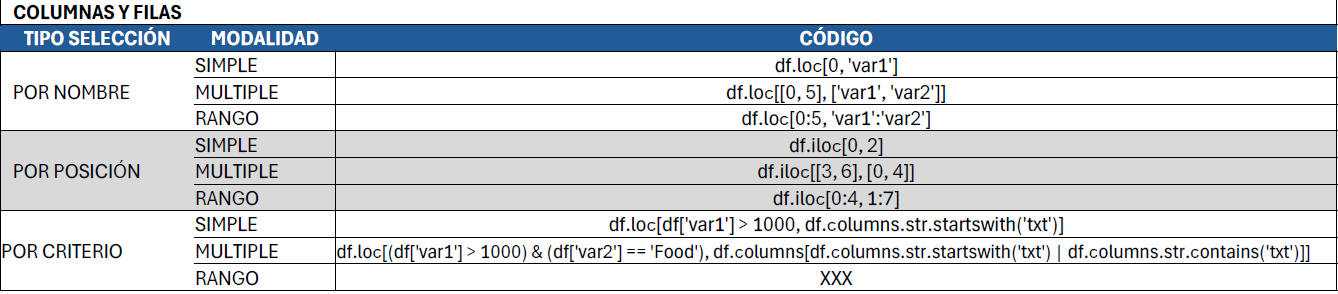

#### Por nombre

In [58]:
df

,id,Funded Date,Funded Amount,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,5257,2007-06-02T03:57:56Z,1000,Ghana,GH,1000,2008-03-13T10:01:32Z,1000.0,Construction,Construction,False,Abla,Working capital,paid
5144,5258,2007-03-24T06:01:16Z,1100,Ghana,GH,1100,2007-12-26T10:15:55Z,1100.0,Construction,Construction,False,Manaa,Working capital,paid
5145,5259,2007-06-05T04:56:45Z,800,Ghana,GH,800,2008-03-13T10:01:33Z,800.0,Food Market,Food,False,Beauty,Working capital,paid


In [59]:
#Una fila y columna
df.loc[0,'Country']

'Uganda'

In [60]:
#Varias filas y/o columnas explícitas
df.loc[[0,5],['Country','Sector']]

,Country,Sector
0,Uganda,Food
5,Uganda,Food


In [61]:
#Varias filas y/o columnas por rango
df.loc[0:5,'Country':'Sector']

,Country,Country Code,Loan Amount,Paid Date,Paid Amount,Activity,Sector
0,Uganda,UG,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food
1,Uganda,UG,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food
2,Uganda,UG,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture
3,Uganda,UG,300,2005-08-27T07:33:49Z,300.0,Clothing Sales,Clothing
4,Uganda,UG,500,2005-12-13T12:09:18Z,500.0,Food Production/Sales,Food
5,Uganda,UG,300,2005-08-27T07:38:20Z,300.0,Restaurant,Food


#### Por posición

In [62]:
#Una fila y columna
df.iloc[0,0]

np.int64(84)

In [63]:
#Varias filas y/o columnas explícitas
df.iloc[[0,5],[3,6]]

,Country,Paid Date
0,Uganda,2005-12-13T12:00:40Z
5,Uganda,2005-08-27T07:38:20Z


In [64]:
#Varias filas y/o columnas por rango
df.iloc[0:5,3:6]

,Country,Country Code,Loan Amount
0,Uganda,UG,500
1,Uganda,UG,500
2,Uganda,UG,500
3,Uganda,UG,300
4,Uganda,UG,500


#### Por criterio

In [65]:
#Un criterio en la fila y otro en la columna
df.loc[df['Funded Amount'] > 1000, df.columns.str.startswith('Funded')]

,Funded Date,Funded Amount
15,2005-03-31T06:27:55Z,2000
62,2005-03-31T06:27:55Z,1400
151,2005-03-31T06:27:55Z,1100
...,...,...
5121,2007-04-21T16:29:35Z,1100
5131,2007-03-28T01:10:27Z,1100
5144,2007-03-24T06:01:16Z,1100


In [66]:
#Varios criterios tanto en las fila como en las columnas
#Sacamos los criterios fuera simplemente por legibilidad

criterio_filas = (df['Funded Amount'] > 1000) & (df.Sector == 'Food')
criterio_columnas = (df.columns.str.startswith('Funded')) | (df.columns.str.contains('Date'))
df.loc[criterio_filas, criterio_columnas]

,Funded Date,Funded Amount,Paid Date
62,2005-03-31T06:27:55Z,1400,2006-12-07T21:58:55Z
254,2006-05-11T22:44:36Z,1225,2007-04-15T16:37:02Z
255,2006-05-02T15:45:57Z,1150,2007-04-15T16:37:02Z
...,...,...,...
5064,2007-04-26T02:49:27Z,1100,2008-05-10T09:03:32Z
5065,2007-05-01T15:42:29Z,1200,2008-05-15T09:02:11Z
5070,2007-03-28T04:48:21Z,1200,2008-06-11T09:03:28Z


## EJERCICIOS

### Carga el dataset original y establece como índice una combinación de las columnas 'Country' y 'Country Code'.

In [67]:
datos = '../../00_Datasets//DataSetKivaCreditScoring.csv'
df = pd.read_csv(datos, sep= ';')
df.set_index(['Country','Country Code'], inplace = True)
df.head()

id           Funded Date  Funded Amount  Loan Amount  \
Country Country Code                                                         
Uganda  UG            84  2005-03-31T06:27:55Z            500          500   
        UG            85  2005-03-31T06:27:55Z            500          500   
        UG            86  2005-03-31T06:27:55Z            500          500   
        UG            88  2005-03-31T06:27:55Z            300          300   
        UG            89  2005-03-31T06:27:55Z            500          500   

                                 Paid Date  Paid Amount  \
Country Country Code                                      
Uganda  UG            2005-12-13T12:00:40Z        500.0   
        UG            2005-12-13T12:04:33Z        500.0   
        UG            2005-12-13T12:06:56Z        500.0   
        UG            2005-08-27T07:33:49Z        300.0   
        UG            2005-12-13T12:09:18Z        500.0   

                                   Activity       Sector  Delinquent  \
Country Country Code                                                   
Uganda  UG                     Butcher Shop         Food       False   
        UG            Food Production/Sales         Food       False   
        UG                     Animal Sales  Agriculture       False   
        UG                   Clothing Sales     Clothing       False   
        UG            Food Production/Sales         Food       False   

                          Name  \
Country Country Code             
Uganda  UG             Justine   
        UG            Geoffrey   
        UG              Apollo   
        UG              Eunice   
        UG                Rose   

                                                                    Use Status  
Country Country Code                                                            
Uganda  UG                               Buy bulls, open a butcher shop   paid  
        UG             Buying more produce each time for greater profit   paid  
        UG            Increase number of goats bought and sold each ...   paid  
        UG            Buy used clothing (mutumbe) of higher quality ...   paid  
        UG                              Buying and reselling of produce   paid

### Selecciona todas las columnas que empiecen por "Loan"

In [69]:
df.loc[:,df.columns.str.startswith('Loan')]

Loan Amount
Country Country Code             
Uganda  UG                    500
        UG                    500
        UG                    500
...                           ...
Ghana   GH                   1000
        GH                   1100
        GH                    800

[5146 rows x 1 columns]

### Selecciona todas las filas donde el sector sea "Retail" y la cantidad financiada supere 1900

In [70]:
df.loc[(df['Sector'] == 'Retail') & (df['Funded Amount'] > 1900 )] 

id           Funded Date  Funded Amount  \
Country    Country Code                                              
Bulgaria   BG            1801  2006-12-09T01:41:09Z           2000   
           BG            2615  2007-01-05T20:59:19Z           2000   
           BG            2702  2007-01-01T00:07:03Z           2000   
Kenya      KE            2720  2006-12-19T03:00:20Z           2000   
Ukraine    UA            2837  2006-12-30T00:04:15Z           2000   
Bulgaria   BG            2957  2007-01-22T22:52:51Z           2000   
           BG            2966  2007-02-19T17:53:21Z           2000   
Azerbaijan AZ            3201  2007-01-05T04:10:56Z           2000   
Bulgaria   BG            3261  2007-01-25T04:58:40Z           2000   

                         Loan Amount             Paid Date  Paid Amount  \
Country    Country Code                                                   
Bulgaria   BG                   2000  2008-03-08T10:02:15Z       2000.0   
           BG                   2000  2008-03-19T10:03:13Z       2000.0   
           BG                   2000  2008-03-08T10:03:02Z       2000.0   
Kenya      KE                   2000                   NaN          NaN   
Ukraine    UA                   2000  2008-01-03T10:19:46Z       2000.0   
Bulgaria   BG                   2000  2008-04-05T10:06:06Z       2000.0   
           BG                   2000  2008-05-05T09:02:55Z       2000.0   
Azerbaijan AZ                   2000  2008-01-18T10:17:14Z       2000.0   
Bulgaria   BG                   2000  2008-04-07T09:03:57Z       2000.0   

                                    Activity  Sector  Delinquent       Name  \
Country    Country Code                                                       
Bulgaria   BG                Cosmetics Sales  Retail       False   Svetlana   
           BG                  General Store  Retail       False      Nurie   
           BG                      Bookstore  Retail       False    Nikolai   
Kenya      KE                      Bookstore  Retail        True  Anonymous   
Ukraine    UA                         Retail  Retail       False     Sergey   
Bulgaria   BG                  General Store  Retail       False      Peter   
           BG            Home Products Sales  Retail       False      Artur   
Azerbaijan AZ                       Perfumes  Retail       False     Narish   
Bulgaria   BG                         Retail  Retail       False    Violeta   

                                                                       Use  \
Country    Country Code                                                      
Bulgaria   BG                                          To equip her office   
           BG                          To change the equipment of the cafe   
           BG                                     To buy a copying machine   
Kenya      KE                To purchase books for her bookstore business.   
Ukraine    UA            To generate more profits and start family comp...   
Bulgaria   BG                                              Working capital   
           BG                        To open a shop for ready-made clothes   
Azerbaijan AZ                                   To open her own  perfumery   
Bulgaria   BG                              To buy a car to supply the shop   

                            Status  
Country    Country Code             
Bulgaria   BG                 paid  
           BG                 paid  
           BG                 paid  
Kenya      KE            defaulted  
Ukraine    UA                 paid  
Bulgaria   BG                 paid  
           BG                 paid  
Azerbaijan AZ                 paid  
Bulgaria   BG                 paid

### Extrae de la fila 10 a la 15 y de las columnas Activity a Name

In [71]:
df.reset_index(inplace=True)
df.loc[10:15, 'Activity':'Name']

,Activity,Sector,Delinquent,Name
10,Food Production/Sales,Food,False,Charles
11,Livestock,Agriculture,False,Gregory
12,Clothing Sales,Clothing,False,Charles
13,Food Production/Sales,Food,False,Haggai
14,Pharmacy,Health,False,Simon
15,Dairy,Agriculture,False,Anonymous


### Extrae las filas de la 5 a la 10 y las columnas 2 a 4

In [72]:
df.iloc[5:11, 2:5]

,id,Funded Date,Funded Amount
5,90,2005-03-31T06:27:55Z,300
6,91,2005-03-31T06:27:55Z,500
7,95,2005-03-31T06:27:55Z,500
8,96,2005-03-31T06:27:55Z,500
9,97,2005-03-31T06:27:55Z,500
10,98,2005-03-31T06:27:55Z,500


In [73]:
df.head()

,Country,Country Code,id,Funded Date,Funded Amount,Loan Amount,Paid Date,Paid Amount,Activity,Sector,Delinquent,Name,Use,Status
0,Uganda,UG,84,2005-03-31T06:27:55Z,500,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,Food,False,Justine,"Buy bulls, open a butcher shop",paid
1,Uganda,UG,85,2005-03-31T06:27:55Z,500,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,Food,False,Geoffrey,Buying more produce each time for greater profit,paid
2,Uganda,UG,86,2005-03-31T06:27:55Z,500,500,2005-12-13T12:06:56Z,500.0,Animal Sales,Agriculture,False,Apollo,Increase number of goats bought and sold each ...,paid
3,Uganda,UG,88,2005-03-31T06:27:55Z,300,300,2005-08-27T07:33:49Z,300.0,Clothing Sales,Clothing,False,Eunice,Buy used clothing (mutumbe) of higher quality ...,paid
4,Uganda,UG,89,2005-03-31T06:27:55Z,500,500,2005-12-13T12:09:18Z,500.0,Food Production/Sales,Food,False,Rose,Buying and reselling of produce,paid


In [ ]:
d